## Assignment 3: Web Scraping

For this assignment, you are required to scrape data from e-commerce or other websites such as [Lelong](http://www.lelong.com.my), [Lazada](http://www.lazada.com.my/), [Mudah](http://www.mudah.my/), [iProperty](https://www.iproperty.com.my/), [Booking](http://www.booking.com), [Expedia](https://www.expedia.com.my/) etc.

You are required to fork this Jupyter Notebook from my Github [here](https://github.com/kuanhoong/EDS-Assignment3 ) and then scrape the latest 1000 items from one of the website mentioned above. The scraped data should include:

* Product Name/Product Title
* Amount/Price
* Brand
* Comments/Reviews
* Number of views

In addition, you are required to export the scraped data to dataframe format and also save a copy in csv format. Upon successful extracting data to dataframe, you are required to do a data analysis on the data. 

Your analysis should provide answers to the following questions:
* What do you think is interesting about this data? Tell a story about some interesting thing you have discovered by looking at the data.
* Visualize your data with matplotlib or with folium library package.

For example, you might consider whether there is a difference in pricings at different times doing the day or city, or whether other factors that influnced the pricings etc. Another thing you might consider is whether there is a relationship between the pricing and number of reviews or comments.

Show your analysis workflow in your Jupyter notebook.

The final submission should be pushed back to your respective Github account.

### Folium

[Folium](https://github.com/python-visualization/folium) makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

In [1]:
pip install folium


The following command must be run outside of the IPython shell:

    $ pip install folium

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
import pandas as pd
import re
import numpy as np
import folium
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import requests

In [5]:
mapit = None
latlon = [ (3.144473, 101.708722), (3.144473, 101.708722),(3.135732, 101.686989)]
for coord in latlon:
    mapit = folium.Map( location=[ coord[0], coord[1] ] ) #allow to view the map
    folium.Marker([3.144473, 101.708722], icon=folium.Icon(color='blue',icon='star'), popup='Federal Hotel').add_to(mapit)
    folium.Marker([3.156374, 101.714579], icon=folium.Icon(color='green',icon='info-sign') , popup='Mandarin Oriental').add_to(mapit)
    folium.Marker([3.135732, 101.686989], icon=folium.Icon(color='red',icon='star') , popup='Le Meridien').add_to(mapit)
mapit

In [179]:
# scrape from lelong

# find the pattern for the first page
#url = 'https://www.lelong.com.my/catalog/all/list?TheKeyword=macbook+pro&D='
url = 'https://www.lelong.com.my/catalog/all/list?TheKeyword=macbook+pro&D='

# write a loop to scrape from page 1 to the last page

product_name=[]
product_price=[]
num_view=[]
num_sold=[]
seller_name=[]
for page in range(1,20):   
    url_page = url+str(page)
    scrape = requests.get(url_page)
    soup = BeautifulSoup(scrape.content, 'lxml')
    link = soup.find_all('div',{'class':'item','class':'summary'})
    price = soup.find_all('div',{'class':'item','class':'col total'}) 
    view = soup.find_all('div', {'class':'item', 'class':'list-sv-icon'})
    sold = soup.find_all('div', {'class':'item', 'class':'pic-box'})   
    length = len(link)
    for i in range(0,length):
        name = link[i].a.get('title')
        product_name.append(name)
        product_price.append(price[i].span.b.string)  
        num_v = re.search(r'\d+', view[i].span.find_next_sibling('span').string)
        num_view.append(num_v.group())
        num_s =  re.search(r'\d+',str(sold[i].find(class_='list-sold')))
        if num_s:
            num_sold.append(num_s.group())
        else:
            num_sold.append(0)
        #seller_name.append(seller[i].span.a.string)
        num_seller = re.search(r'seller inline-block', str(link[i]) )
        #print(link[i].find(class_='seller inline-block'))
        if num_seller:
            seller_name.append(link[i].find(class_='seller inline-block').span.a.string)
        else:
            seller_name.append('UNKNOWN')
        
    
        
# all_product_price = {}
# all_product_price = dict(zip(product_name, product_price))
# all_product_price

#print(len(product_name), len(num_view))

In [7]:
# write to csv
# convert the list to a pandas dataframe

df = pd.DataFrame({'name':product_name})
df
df.to_csv('output.csv', index=False)



In [180]:
# write to csv
# convert the list to a pandas dataframe

df = pd.DataFrame({'name':product_name, 'price':product_price, 'view': num_view, 'sold': num_sold, 'seller':seller_name})
df['price'] = df.price.apply(lambda x: x.lstrip('RM '))
df['price'] = df['price'].apply(pd.to_numeric, errors='coerce')
df['view'] = df['view'].apply(pd.to_numeric, errors='coerce')
df['sold'] = df['sold'].apply(pd.to_numeric, errors='coerce')
df

,name,price,seller,sold,view
0,â Urban Armor Gear UAG MacBook Pro 4th W/WO ...,339.00,NaviFUN,6,518
1,Genuine Apple 85W MagSafe 2 Power Adapter Char...,170.00,kitkit85,8,1559
2,MacBook Pro Retina 13 13.3 A1502 A1425 Matte F...,28.00,xsoho,620,20297
3,Macbook Pro 2016 2017 Magsafe Magnetic Adapter...,88.00,verygoodz,0,94
4,Apple Macbook Air Pro Decal Stickers Mac Air ...,7.90,limgrouptrading,277,3795
5,STM Hynt 15 Inch MacBook Pro Case,275.00,superbuy,0,17
6,STM Hynt 13 Inch MacBook Pro Case,275.00,superbuy,0,18
7,Casual Soft Sleeve Laptop Bag Case hidden hand...,38.90,fasfone,15,821
8,Cocoon Graphite Sleeve Up To 13' MacBook Pro ...,129.90,LaiBuy,0,945
9,Apple 60W MagSafe 2 Power Adapter (for MacBook...,349.00,superbuy,0,445


In [218]:
#min price product
df.loc[df['price'] == df['price'].min()]

#max price product
df.loc[df['price'] == df['price'].max()]

#min view product
df.loc[df['view'] == df['view'].min()]

#max view product
df.loc[df['view'] == df['view'].max()]

#top 10% popular product
df1 = df[(df.view >= df.view.quantile(.90))].sort_values(['sold','view'], ascending={1,0})
df1

#mean price for top 10% popular product
df1['price'].mean()

#product which was sold
df.loc[df['sold'] > 0].sort_values(['sold'], ascending=False)

#high view without sales
df2 = df[(df.view >= df.view.quantile(.90)) & (df['sold'] == 0)].sort_values(['view'], ascending=False)
df2

#top sales
df.loc[df['sold'] > 0].groupby('seller')[['sold']].sum().sort_values(['sold'], ascending=False)

#top profit per seller
df['profit'] = df.loc[df['sold'] > 0]['sold'] * df.loc[df['sold'] > 0]['price']
df.loc[df['profit'] > 0].groupby('seller')[['profit', 'sold', 'view']].sum().sort_values(['profit'], ascending=False)


#top profit per product
df['profit'] = df.loc[df['sold'] > 0]['sold'] * df.loc[df['sold'] > 0]['price']
df.loc[df['profit'] > 0].groupby(['seller','name'])[['profit', 'sold', 'view']].sum().sort_values(['profit'], ascending=False)

df.sort_values(['profit'], ascending=False).iloc[0:10]['seller']

df.sort_values(['profit'], ascending=False).iloc[0:10]['profit']

2       17360.00
19       6570.00
1012     5992.00
400      4004.00
402      3234.00
1023     3060.00
1060     2632.00
1074     2550.00
1024     2411.33
424      2268.00
Name: profit, dtype: float64

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline

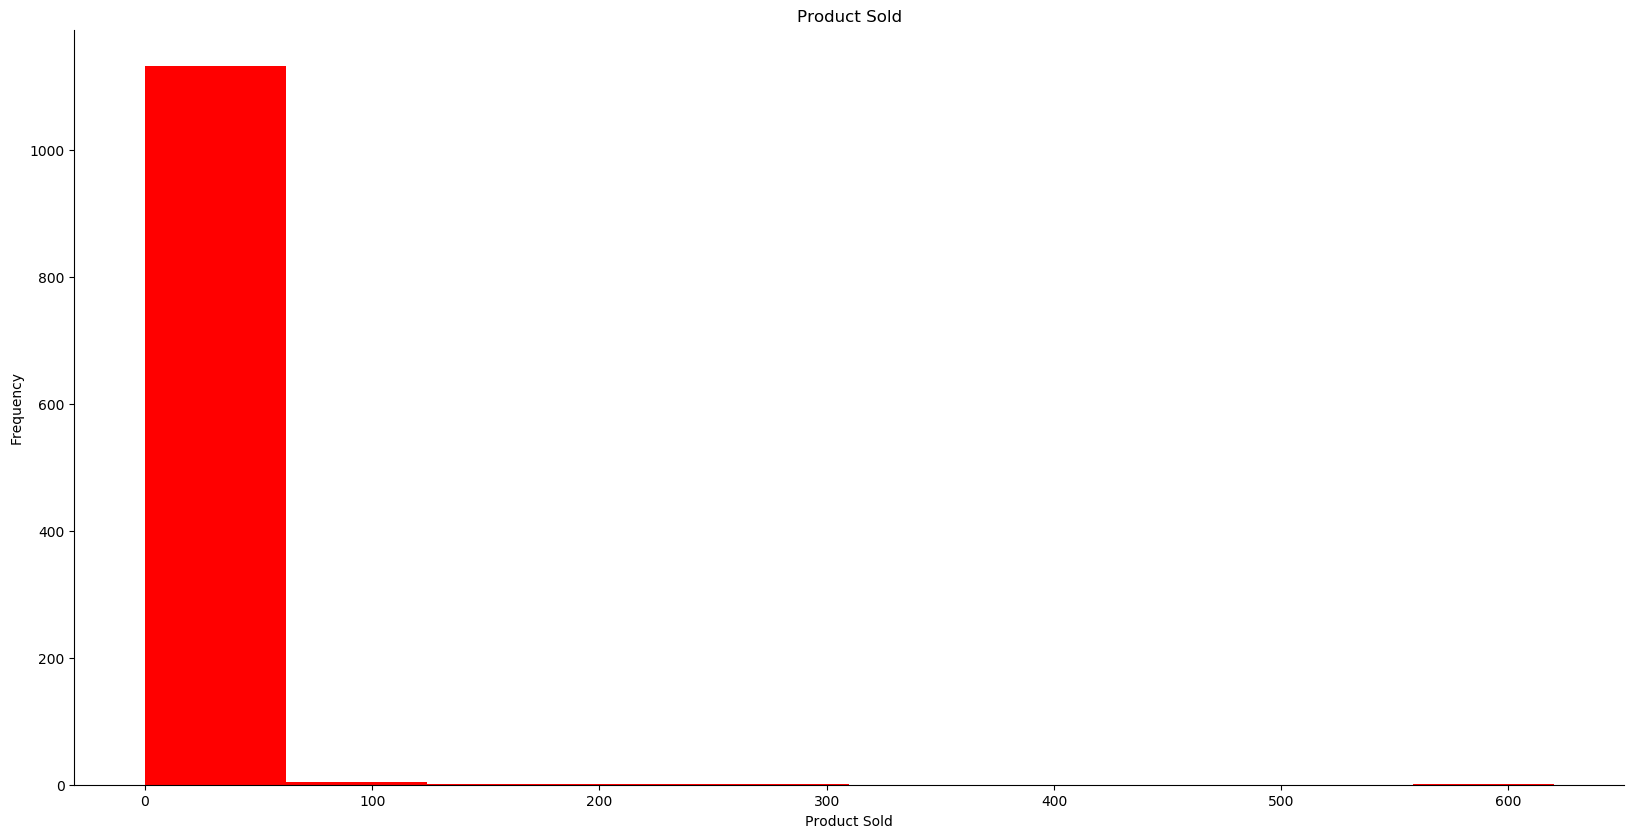

In [205]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
plt.hist(df['sold'],color="red") 

plt.title('Product Sold')
plt.xlabel('Product Sold')
plt.ylabel('Frequency')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

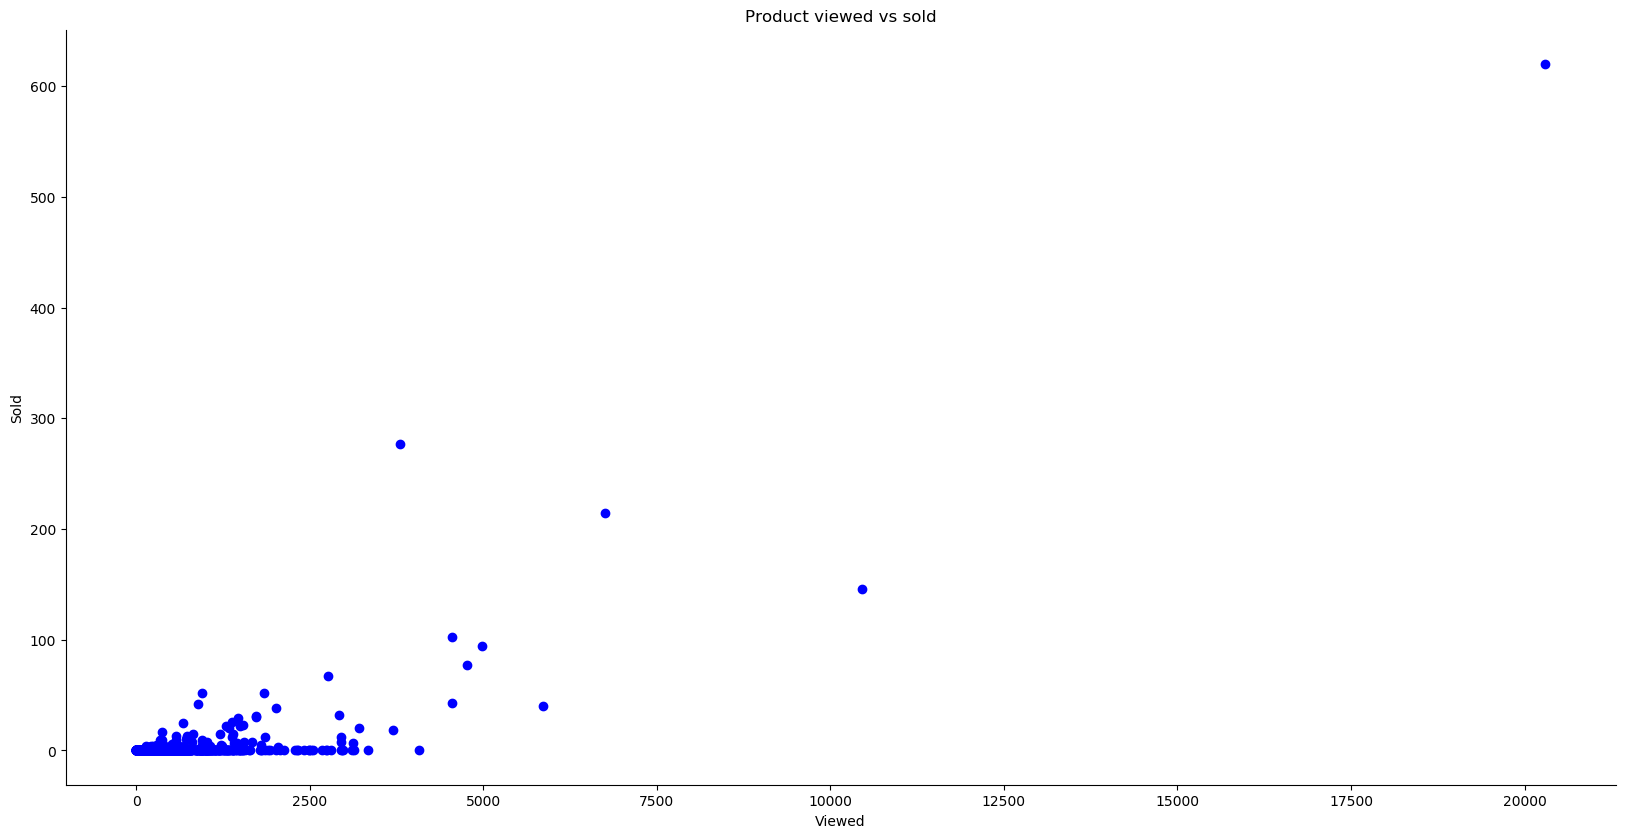

In [210]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
plt.scatter(df['view'],df['sold'],color="blue")

plt.title('Product viewed vs sold')
plt.xlabel('Viewed')
plt.ylabel('Sold')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

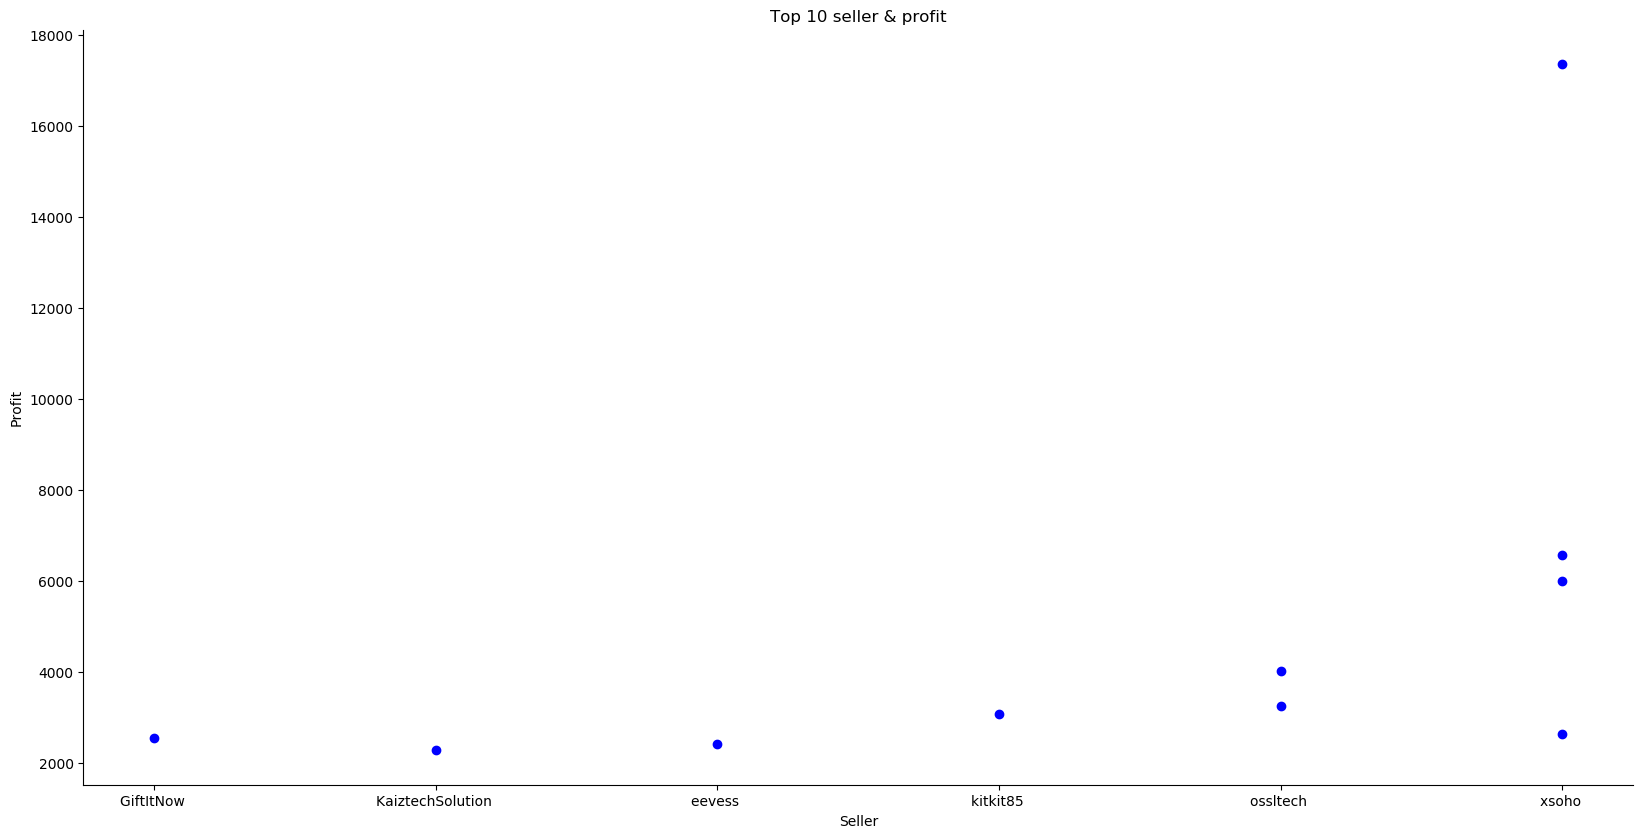

In [220]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
plt.scatter(df.sort_values(['profit'], ascending=False).iloc[0:10]['seller'],df.sort_values(['profit'], ascending=False).iloc[0:10]['profit'],color="blue")

plt.title('Top 10 seller & profit')
plt.xlabel('Seller')
plt.ylabel('Profit')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')